# Python Mini Project - Data Cleaning

This project demonstrates essential data-cleaning techniques using Python libraries `Pandas` and `NumPy`. The dataset will be processed through the following steps, including:

- Removing duplicate entries to ensure data integrity
- Handling outlier and missing values through imputation or removal
- Standardizing data formats for consistency across the dataset
- Transforming features to ensure the data is clean, suitable, and well-prepared for analysis or modeling

These steps help prepare the data for more accurate analysis and modeling.


## Outline
1. Import libraries
2. Load and read dataset
3. Clean dataset
    - Remove duplicates
    - Identify & handle outliers
    - Address missing values
    - Standardize data formats (optional)
    - Transform features (optional)
4. Save final dataset

## 1. Import Libraries

For the data preprocessing process, several libraries are required to manipulate and transform data to meet analysis needs.

- `NumPy`: This library is primarily used for performing **low-level** numerical computations and efficiently handling multi-dimensional arrays (1D arrays, 2D matrices, 3D tensors, etc.).
- `Pandas`: This library is built on top of `NumPy`. It provides **higher-level** data structures, such as Series (labeled 1D arrays) and DataFrames (labeled 2D tables), along with powerful tools for data manipulation, cleaning, and analysis, making it more intuitive for working with structured data.

In [130]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical computing

## 2. Load and Read Dataset

Once we import the necessary libraries, we can now load the dataset (`df_arabica_clean.csv`, a CSV file from [Kaggle](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi)) into a Pandas DataFrame using `read_csv()` to make it easier to work with. 

In [131]:
df = pd.read_csv("df_arabica_clean.csv")

### 2-1. View General Information about the DataFrame

Before diving into any analysis, it's essential to understand the dataset first. In addition to reading the Kaggle dataset description, it's crucial to inspect the dataset using the `info()` function. This function provides a comprehensive overview of the dataset, giving us insights into its structure, data types, and any missing values, which are vital for preparing the data before conducting any analysis. 

Please note, if we only want to quickly check the size (dimensions) of the dataset, we can use `shape()`. This provides a concise way to get the number of rows and columns without all the additional details.

In [132]:
df.info()  # Shows column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

Overall, we can see that there are 207 rows with 41 columns, with the following distribution of data types:

- 13 floating point variables
- 6 interger variables
- 22 categorical variables

We can easily see that there are a few columns with missing data:
- `Farm Name`: 2 missing values
- `Lot Number`: 1 missing value
- `Mill`: 3 missing values
- `ICO Number`: 132 missing values (significantly more than others; likely an optional field for some entries)
- `Variety`: 6 missing values
- `Processing Method`: 5 missing values

Since the `ICO Number` has significantly large missing values, I looked into the missing ICO numbers to ensure it wouldn't affect the analysis. It seems lots of coffee beans do not have the ICO numbers. Usually, coffee beans that are commercial grade (commodity coffee) are more likely to follow the ICO regulations. 

Here are some reasons that beans might not have ICO numbers: 
- Specialty coffee sold through direct trade (e.g., farm-to-roaster relationships)
- Micro-lots and experimental coffee that bypass large commodity markets
- Coffee consumed within the producing country (not exported)

When studying **coffee quality and sustainability**, missing ICO numbers may not be a significant issue in the dataset, as these factors often relate to the coffee’s trade and market structure rather than its quality.

### 2-2. Quick Preview of Data 

We can also use `head()` to get a glimpse of the data, allowing us to check for any obvious issues or anomalies. Similarly, `tail()` can be used to inspect the last few rows and verify its consistency.

In [133]:
df.head() # Displays the first 5 rows of the DataFrame for a quick preview

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [134]:
df.tail() # Displays the last 5 rows of the DataFrame for a quick preview; to check consistensy

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600
206,206,206,Brazil,Walter Matter,1058 y 1059,Beneficio humedo/seco,002/1208/1016,Descafeinadores Mexicano SA. de CV,850-1100,Minas Gerais,...,78.00,11.3,0,0,green,1,"November 18th, 2023",Centro Agroecológico del Café A.C.,"Instituto de Ecología A. C., Campus III Edific...",Stephany Escamilla Femat - Tel. +52 228 842180...


After reviewing both results above, no discrepancies or inconsistencies were identified, indicating the data appears fairly consistent.

### 2-3. Explore Summary Statistics for Numerical and Categorical Columns

In addition to understanding the structure and completeness of the data, it’s important to explore the distribution and characteristics of the data values as well. We can achieve this using the following functions:

- `describe()`: Displays summary statistics for **numerical** columns, inclduing count, mean, standard deviation, min, max, etc.
- `describe(include='object')`: Provides summary statistics for **categorical** columns, inclduing count, unique values, the most frequent value (top), and its frequency

In [135]:
df.describe()  # Summary statistics for numerical columns

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


For numerical variables, we typically examine central tendency, spread & dispersion, outliers, and missing data.


Here are some key findings of the numerical data: 
- `Number of Bags`: Has a large range (1 to 2240) and high standard deviation (~244.5), indicating extreme variations. We should check for potential outliers.
- `Aroma`, `Flavor`, `Aftertaste`, `Acidity`, `Body`, `Balance`, `Uniformity`: Mostly around 7.6–7.7, with low standard deviations (0.1–0.3). No immediate concerns, but we should confirm there are no unexpected outliers.
- `Clean Cup` and `Sweetness`: Consistently scored 10, suggesting no variation. We should verify whether these are meaningful variables or redundant.
- `Total Cup Points`: Ranges from 78 to 89, with a mean of ~83.7. No major inconsistencies, but outliers should still be checked.
- `Moisture Percentage`: Ranges from 0% to 13.5%, with a mean of 10.7%, showing that most of the beans fall within the ideal moisture content range (10–12%). Check if 0% values are errors or missing values recorded as zero.
- Defects (`Category One Defects`, `Category Two Defects`): `Category Two Defects` appear more frequently than `Category One Defects`. Need to check for missing values and verify data distribution.
- `Quakers`: Most coffee batches have 0 quakers, but a few have up to 12, suggesting possible outliers. The data seems skewed, so further checks may be needed.


In [136]:
df.describe(include='object').iloc[:, :20]  # Summary for categorical columns

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Color,Expiration,Certification Body
count,207,205,206,204,75,207,206,205,206,207,207,207,207,207,201,207,202,207,207,207
unique,22,172,187,162,67,72,97,120,172,39,21,7,75,80,48,1,10,12,75,21
top,Taiwan,Doi Tung Development Project,1,Dry Mill,non,Taiwan Coffee Laboratory,1200,Chiayi,Doi Tung Development Project,30 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,green,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室
freq,61,7,11,11,5,51,23,12,7,39,83,99,40,30,27,207,124,101,40,83


After careful review, I believe the following categorical variables may provide useful insights into the dataset:

- `Country of Origin`: The dataset includes 22 countries, with "Taiwan" being the most frequent (66 out of 207, a relatively large proportion). We could analyze the distribution on a map for better visualization or focus on a subset of countries or group them by region. This approach could help simplify the analysis and communicate insights more effectively without overwhelming the viewer.
- `Bag Weight`: There are 39 unique values for bag weight, and "30 kg" is the most frequent (66 out of 207, relatively frequent). This would be useful to examine further later on during exploratory data analysis.
- `Harvest Year`: There are 7 unique years, with "2021/2022" having the highest frequency (99 out of 207, relatively large). Worth checking for trends or seasonality.
- `Grading Date` & `Expiration`: Both variables have 75 unique values with the same top frequency (40 out of 207). It seems that the `Expiration date` is consistently one year after the `Grading date`. This could be worth verifying to ensure consistency.
- `Variety`: With 48 unique values, Gesha has the highest frequency. It might be helpful to check for consistency in category names, as there may be variations or typos.
- `Processing Method`: There are 10 unique values, and "Washed/Wet" is the most frequent (124 out of 207, a relatively large proportion). It’s worth checking to ensure the categories are properly defined and consistent.
- `Color`: There are 12 unique values, with green being the most frequent (101 out of 207, a relatively large proportion). This might warrant further exploration to check for consistency or unusual entries.
- `Company`, `In-Country Partner`, `Owner`, `Certification Body`: It may be beneficial to check the names for consistency. Additionally, both `In-Country Partner` and `Certification Body` have the same number of unique values and top frequencies, suggesting potential overlap or redundancy.


Here’s a summary of the key steps to take after removing duplicates:

1. Handle Outliers: Investigate outliers in variables like `Number of Bags`, `Moisture Percentage`, and `Quakers`
2. Verify No-Variation Variables: Decide whether to keep or remove variables like `Clean Cup` and `Sweetness` that show no variation
3. Check for Missing Data: Address any missing or incorrect values, especially in fields like `Moisture Percentage`
4. Standardize Categorical Data: Ensure consistency in categorical variables such as `Variety`, `Processing Method`, and `Company`
5. Validate Dates: Ensure `Grading Date` and `Expiration` follow a consistent pattern
6. Group Categorical Data: Consider grouping categorical variables with too many unique values to simplify the analysis

## 3. Clean Dataset 

In this section, we will go through the following steps to clean and prepare the dataset for analysis:
- Remove Duplicates: Identify and eliminate duplicate rows to ensure unique and accurate records
- Handle Outliers: Detect and address outliers to prevent them from distorting analysis and model performance with skewed data
- Address Missing Values: Impute missing values using appropriate statistical methods or remove records if necessary
- Transform Features: Normalize, scale, or encode features to improve interpretability and prepare data for analysis or modeling


### 3-1. Remove Duplicates

Once we get a better sense of the data, we can move forward to identifying duplicates using `duplicated()` function. We usually handle duplicates first then null since duplicates may skew the data. Removing duplicates can help handle nulls more effectively using distinct values. 

In [137]:
duplicate_rows = df.duplicated() # Check for exact duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

duplicates = df[duplicate_rows] # Find and view duplicate rows 
print("Duplicate rows:", duplicates)

duplicates_by_column = df[df.duplicated(subset=['ID'])] # Count and handle duplicates in specific columns
print("Number of duplicate rows based on 'ID':", duplicates_by_column.shape[0])

Number of duplicate rows: 0
Duplicate rows: Empty DataFrame
Columns: [Unnamed: 0, ID, Country of Origin, Farm Name, Lot Number, Mill, ICO Number, Company, Altitude, Region, Producer, Number of Bags, Bag Weight, In-Country Partner, Harvest Year, Grading Date, Owner, Variety, Status, Processing Method, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Overall, Defects, Total Cup Points, Moisture Percentage, Category One Defects, Quakers, Color, Category Two Defects, Expiration, Certification Body, Certification Address, Certification Contact]
Index: []

[0 rows x 41 columns]
Number of duplicate rows based on 'ID': 0


There are no duplicate rows in the dataset. However, to ensure data integrity, we can use the `drop_duplicates()` function in Pandas, which is the primary method for removing duplicates. If needed, we can specify columns to check for duplicates rather than considering entire rows using `drop_duplicates(subset=['Column1', 'Column2'])`. This helps maintain a clean dataset while preventing unintended duplications in the analysis.

In [138]:
df_duplicates_dropped = df.drop_duplicates()

print("Original shape:", df.shape)
print("After dropping duplicates:", df_duplicates_dropped.shape)

Original shape: (207, 41)
After dropping duplicates: (207, 41)


### 3-2. Identify & Handle Outliers

Based on the summary statistics from section 2-3, we should look into outliers in variables `Number of Bags`, `Moisture Percentage`, and `Quakers` using the interquartile range (IQR) method. 

#### 3-2-1. Investigate `Number of Bags`

In [162]:
Q1 = df_duplicates_dropped['Number of Bags'].quantile(0.25)
Q3 = df_duplicates_dropped['Number of Bags'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_numOfBag = df_duplicates_dropped[(df_duplicates_dropped['Number of Bags'] < lower_bound) | 
                                    (df_duplicates_dropped['Number of Bags'] > upper_bound)]
print("Number of outliers:", outliers_numOfBag.shape[0])
print(outliers_numOfBag[['ID', 'Number of Bags']])

Number of outliers: 2
      ID  Number of Bags
129  129             960
202  202            2240


During this data cleaning process, we identified 2 outliers in the `Number of Bags` column. These values (960 and 2240) are significantly higher than the typical range of the dataset. Instead of removing them immediately, we will flag them for further review to ensure data integrity. This approach allows us to revisit these values during exploratory data analysis (EDA) and determine whether they should be excluded, transformed, or retained based on their context and impact on the analysis.

In [163]:
# Flag outliers
df_duplicates_dropped['Outlier_Flag_Number_of_Bags'] = df_duplicates_dropped['Number of Bags'].apply(
    lambda x: True if x < lower_bound or x > upper_bound else False)

# Inspect flagged rows
print("Total rows:", df_duplicates_dropped.shape[0])
print("Number of outliers:", outliers_numOfBag.shape[0])
print(df_duplicates_dropped[['ID', 'Number of Bags', 'Outlier_Flag_Number_of_Bags']])

Total rows: 207
Number of outliers: 2
      ID  Number of Bags  Outlier_Flag_Number_of_Bags
0      0               1                        False
1      1               1                        False
2      2              19                        False
3      3               1                        False
4      4               2                        False
..   ...             ...                          ...
202  202            2240                         True
203  203             300                        False
204  204             343                        False
205  205               1                        False
206  206             600                        False

[207 rows x 3 columns]


#### 3-2-2. Investigate `Moisture Percentage`

In [79]:
Q1 = df_duplicates_dropped['Moisture Percentage'].quantile(0.25)
Q3 = df_duplicates_dropped['Moisture Percentage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_moistPct = df_duplicates_dropped[(df_duplicates_dropped['Moisture Percentage'] < lower_bound) | 
                                            (df_duplicates_dropped['Moisture Percentage'] > upper_bound)]
print("Number of outliers:", outliers_moistPct.shape[0])
print(outliers_moistPct[['ID', 'Moisture Percentage']])

Number of outliers: 1
      ID  Moisture Percentage
125  125                  0.0


Given the small dataset (207 rows), outright removal could lead to unnecessary data loss. A better approach may be to replace it with a reasonable value, such as:

- **Mean** Moisture Percentage: The mean is a good choice if the data follows a normal distribution (bell-shaped). It retains the overall balance of the dataset
- **Median** Moisture Percentage: The median is better when the data is skewed (e.g., right-skewed or left-skewed). It is robust to outliers, meaning extreme values won’t impact it much. This is usually the safest choice if the data isn’t normally distributed
- **Mode** (Most Frequent Value): The mode is useful if Moisture Percentage has repeated values (e.g., most samples have the same moisture level). It’s good for categorical-like distributions but less common for continuous data

Since this seems like an error rather than a natural outlier, replacing it with a reasonable estimate would maintain data integrity while avoiding distortions. We will first check the normality of the data here using the following visualization methods and statistical tests:

- Visual methods (Histogram, Boxplot, QQ Plot) help spot skewness and outliers quickly
- Statistical tests (Shapiro-Wilk for smaller dataset, Kolmogorov-Smirnov for larger ones) provide formal evidence for normality

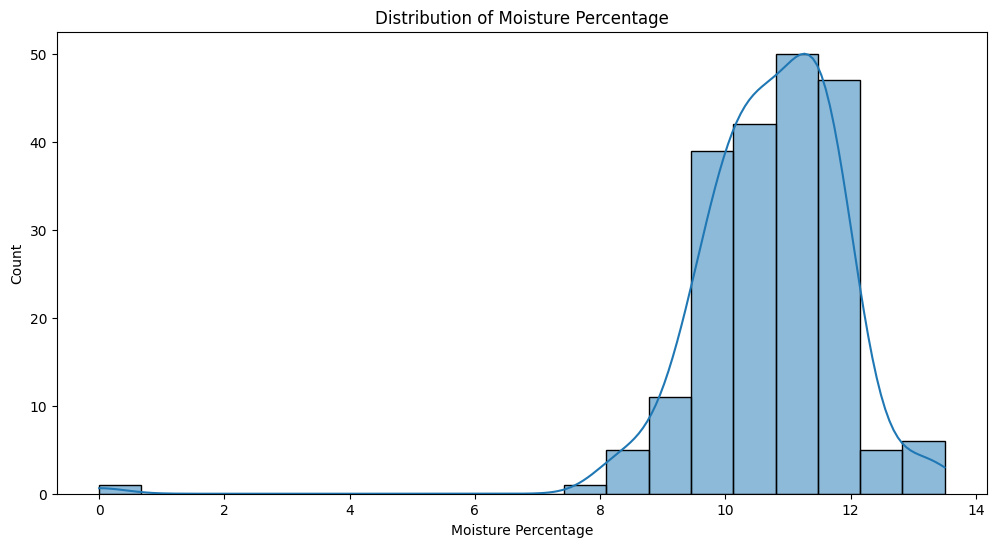

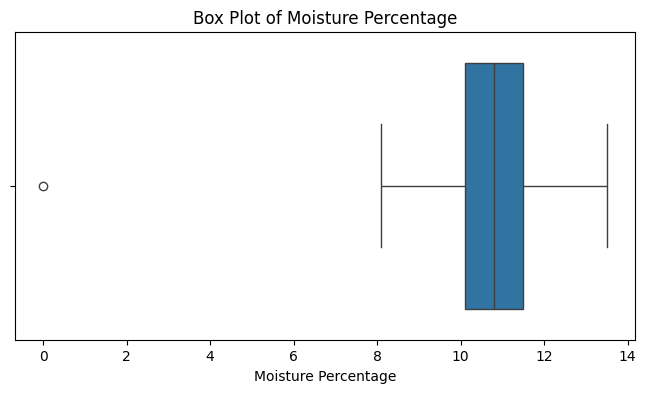

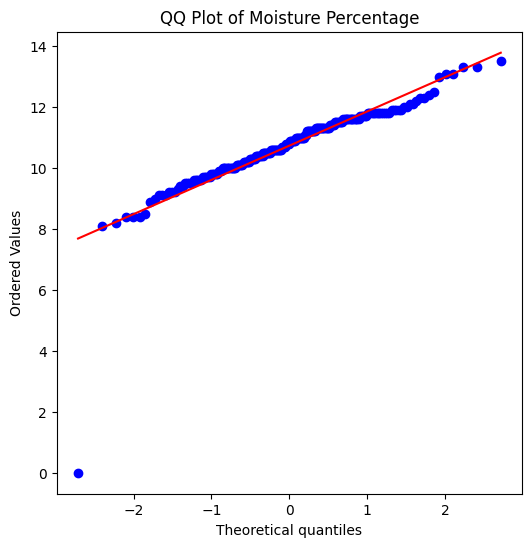

Shapiro-Wilk Test: p-value = 0.00000


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Histogram & KDE Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['Moisture Percentage'], kde=True, bins=20)
plt.title('Distribution of Moisture Percentage')
plt.show()

# Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Moisture Percentage'])
plt.title('Box Plot of Moisture Percentage')
plt.show()

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(df['Moisture Percentage'], dist="norm", plot=plt)
plt.title('QQ Plot of Moisture Percentage')
plt.show()

# Shapiro-Wilk Test (Good for small datasets)
shapiro_stat, shapiro_p = shapiro(df['Moisture Percentage'])
print(f'Shapiro-Wilk Test: p-value = {shapiro_p:.5f}')

# Kolmogorov-Smirnov Test (For larger dataset)
# ks_stat, ks_p = kstest(df['Moisture Percentage'], 'norm')
# print(f'Kolmogorov-Smirnov Test: p-value = {ks_p:.5f}')

The histogram forms a bell-shaped curve and the QQ plot aligns with the diagonal, the data is likely normal. Also, the boxplot is symmetrical with few outliers, it supports the normality hypothesis. For the statistical testing using Shapiro-Wilk test, p-value is ≤ 0.05, it rejects normality (data is likely not normal).

There is a conflict between visual inspections and the statistical test. We will use the **median** to be on the safe side. Since the normality test failed, this suggests potential mild skewness or outliers, and median is less affected by these issues.

In [110]:
median_value = df_duplicates_dropped['Moisture Percentage'].median()
df_duplicates_dropped['Moisture Percentage'] = df_duplicates_dropped['Moisture Percentage'].replace(0.0, median_value)

# Double check if the outlier is modified
Q1 = df_duplicates_dropped['Moisture Percentage'].quantile(0.25)
Q3 = df_duplicates_dropped['Moisture Percentage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_moistPct = df_duplicates_dropped[(df_duplicates_dropped['Moisture Percentage'] < lower_bound) | 
                                            (df_duplicates_dropped['Moisture Percentage'] > upper_bound)]
print("Number of outliers:", outliers_moistPct.shape[0])
print(outliers_moistPct[['ID', 'Moisture Percentage']])

print("Total rows:", df_duplicates_dropped.shape[0])

Number of outliers: 0
Empty DataFrame
Columns: [ID, Moisture Percentage]
Index: []
Total rows: 207


#### 3-2-3. Investigate `Quakers`

In [154]:
Q1 = df_duplicates_dropped['Quakers'].quantile(0.25)
Q3 = df_duplicates_dropped['Quakers'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_quackers = df_duplicates_dropped[(df_duplicates_dropped['Quakers'] < lower_bound) | 
                                    (df_duplicates_dropped['Quakers'] > upper_bound)]
print("Number of outliers:", outliers_quackers.shape[0])
print(outliers_quackers[['ID', 'Quakers']])

Number of outliers: 16
      ID  Quakers
13    13        3
34    34        3
48    48        3
51    51        3
60    60        3
76    76        5
83    83        3
101  101        5
102  102        3
165  165        7
195  195        8
198  198        3
199  199        6
200  200       10
204  204        9
205  205       12


We identified several outliers in the `Quakers` feature, with values ranging from 3 to 12. These values are notably higher than the typical range and could represent either data errors or legitimate extreme cases. Instead of removing these outliers immediately, we will flag them for further review during the EDA stage (similar to `Number of Bags`). This will allow us to better understand their context and impact, and make an informed decision on whether they should be excluded, adjusted, or kept as-is for further analysis.

In [164]:
# Flag outliers
df_duplicates_dropped['Outlier_Flag_Quakers'] = df_duplicates_dropped['Quakers'].apply(
    lambda x: True if x < lower_bound or x > upper_bound else False)

# Inspect flagged rows
print("Total rows:", df_duplicates_dropped.shape[0])
print("Number of outliers:", outliers_quackers.shape[0])
print(df_duplicates_dropped[['ID', 'Quakers', 'Outlier_Flag_Quakers']])

Total rows: 207
Number of outliers: 16
      ID  Quakers  Outlier_Flag_Quakers
0      0        0                 False
1      1        0                 False
2      2        0                 False
3      3        0                 False
4      4        2                 False
..   ...      ...                   ...
202  202        0                 False
203  203        2                 False
204  204        9                 False
205  205       12                 False
206  206        0                 False

[207 rows x 3 columns]


### 3-3. Address Missing Values

Heatmaps: For missing values.?

In [185]:
null_counts = df_duplicates_dropped.isnull().sum() # Count missing values per column
# print(null_counts)

null_col_counts = null_counts[null_counts > 0] # Columns with missing values (+ counts)
print(null_col_counts)
print("# of variables that has missing values: ", null_col_counts.count())

Farm Name              2
Lot Number             1
Mill                   3
ICO Number           132
Altitude               1
Region                 2
Producer               1
Variety                6
Processing Method      5
dtype: int64
# of variables that has missing values:  9


In [166]:
# data_null = (df_duplicates_dropped.isnull().sum()/ len(df_duplicates_dropped)) * 100 # Missing ratio per column
# print(data_null)
# data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)[:30]
# missing_data = pd.DataFrame({'Missing Ratio' :data_na})
# missing_data.head(20) 

data_null_cols = (null_col_counts/ len(df_duplicates_dropped)) * 100 # Missing ratio per column
data_null_cols = data_null_cols.sort_values(ascending=False)
# print(data_null_cols)
missing_data = pd.DataFrame({'Missing Ratio (%)' : data_null_cols.round(2)})
# missing_data = missing_data.reset_index().rename(columns={'index': 'Variable'})
missing_data.head(null_col_counts.count()) 

,Missing Ratio (%)
ICO Number,63.77
Variety,2.90
Processing Method,2.42
Mill,1.45
Farm Name,0.97
Region,0.97
Lot Number,0.48
Altitude,0.48
Producer,0.48


All missing values in this dataset are in categorical variables. As noted in Section 2-1, we don’t need to adjust the `ICO Number`. For the other columns with moderate to low missing ratios (2.9% and lower), imputing missing values with the mode (most frequent value) for each categorical variable is a reasonable and effective approach. Given that many of these columns have very low missing ratios (<1%), this imputation should not significantly impact the analysis.

In [216]:
missing_ids_variety = df_duplicates_dropped.loc[df_duplicates_dropped['Variety'].isna(), 'ID'].tolist()
missing_ids_proc = df_duplicates_dropped.loc[df_duplicates_dropped['Processing Method'].isna(), 'ID'].tolist()
missing_ids_mill = df_duplicates_dropped.loc[df_duplicates_dropped['Mill'].isna(), 'ID'].tolist()
missing_ids_farm = df_duplicates_dropped.loc[df_duplicates_dropped['Farm Name'].isna(), 'ID'].tolist()
missing_ids_region = df_duplicates_dropped.loc[df_duplicates_dropped['Region'].isna(), 'ID'].tolist()
missing_ids_lotnum = df_duplicates_dropped.loc[df_duplicates_dropped['Lot Number'].isna(), 'ID'].tolist()
missing_ids_alti = df_duplicates_dropped.loc[df_duplicates_dropped['Altitude'].isna(), 'ID'].tolist()
missing_ids_prod = df_duplicates_dropped.loc[df_duplicates_dropped['Producer'].isna(), 'ID'].tolist()

# Combine all lists into one
all_ids = (missing_ids_variety + missing_ids_proc + missing_ids_mill + 
missing_ids_farm + missing_ids_region + missing_ids_lotnum + 
missing_ids_alti + missing_ids_prod)

# Count occurrences
from collections import Counter
id_counts = Counter(all_ids)

# Convert to DataFrame
df_missing_id = pd.DataFrame(list(id_counts.items()), columns=['ID', 'Count'])
print(df_missing_id)

Empty DataFrame
Columns: [ID, Count]
Index: []


We have identified that ID #105 has 8 missing values across categorical variables, which is significant enough to warrant removal. Therefore, this row will be excluded from the dataset. For the remaining rows with missing values in categorical variables, the missing values will be replaced with the mode. This approach ensures minimal impact on the analysis, as the missing ratios for these variables are relatively low, and using the mode preserves the general distribution of the data without introducing significant bias.

In [203]:
df_adjust_missing = df_duplicates_dropped[df_duplicates_dropped['ID'] != 105]
print(df_adjust_missing.shape)

(206, 43)


In [222]:
df_adjust_missing.loc[:, 'Variety'] = df_adjust_missing['Variety'].fillna(df['Variety'].mode()[0])
df_adjust_missing.loc[:, 'Processing Method'] = df_adjust_missing['Processing Method'].fillna(df['Processing Method'].mode()[0])
df_adjust_missing.loc[:, 'Mill'] = df_adjust_missing['Mill'].fillna(df['Mill'].mode()[0])
df_adjust_missing.loc[:, 'Farm Name'] = df_adjust_missing['Farm Name'].fillna(df['Farm Name'].mode()[0])
df_adjust_missing.loc[:, 'Region'] = df_adjust_missing['Region'].fillna(df['Region'].mode()[0])
df_adjust_missing.loc[:, 'Lot Number'] = df_adjust_missing['Lot Number'].fillna(df['Lot Number'].mode()[0])
df_adjust_missing.loc[:, 'Altitude'] = df_adjust_missing['Altitude'].fillna(df['Altitude'].mode()[0])
df_adjust_missing.loc[:, 'Producer'] = df_adjust_missing['Producer'].fillna(df['Producer'].mode()[0])

In [223]:
# Double check if everything is modified
missing_ids_variety = df_adjust_missing.loc[df_adjust_missing['Variety'].isna(), 'ID'].tolist()
missing_ids_proc = df_adjust_missing.loc[df_adjust_missing['Processing Method'].isna(), 'ID'].tolist()
missing_ids_mill = df_adjust_missing.loc[df_adjust_missing['Mill'].isna(), 'ID'].tolist()
missing_ids_farm = df_adjust_missing.loc[df_adjust_missing['Farm Name'].isna(), 'ID'].tolist()
missing_ids_region = df_adjust_missing.loc[df_adjust_missing['Region'].isna(), 'ID'].tolist()
missing_ids_lotnum = df_adjust_missing.loc[df_adjust_missing['Lot Number'].isna(), 'ID'].tolist()
missing_ids_alti = df_adjust_missing.loc[df_adjust_missing['Altitude'].isna(), 'ID'].tolist()
missing_ids_prod = df_adjust_missing.loc[df_adjust_missing['Producer'].isna(), 'ID'].tolist()

# Combine all lists into one
all_ids = (missing_ids_variety + missing_ids_proc + missing_ids_mill + 
missing_ids_farm + missing_ids_region + missing_ids_lotnum + 
missing_ids_alti + missing_ids_prod)

# Count occurrences
id_counts = Counter(all_ids)

# Convert to DataFrame
df_missing_id = pd.DataFrame(list(id_counts.items()), columns=['ID', 'Count'])
print(df_missing_id)

Empty DataFrame
Columns: [ID, Count]
Index: []


In [224]:
df_missing_adjusted=df_adjust_missing

### 3-4. Standardize Data Formats

We can standardized the date time format for further analysis or modeling needs in this stage.

In [184]:
# To be updated

### 3-5. Transform Features

We can create new features for further analysis or modeling needs.

_Note on 02/26/25: not sure what to add yet, will update later._

In [204]:
# To be updated

## 4. Save Final Dataset

We can now save the clean dataset for exploratory analysis. At this stage, we may also consider excluding columns that are irrelevant to the analysis to streamline the dataset further.

In [225]:
df_cleaned = df_missing_adjusted

In [226]:
print(df_cleaned.shape)
df_cleaned.head()

(206, 43)


,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Outlier_Flag_Number_of_Bags,Outlier_Flag_Quakers
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,False,False
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",False,False
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",False,False
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,False,False
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,False,False


In [227]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)